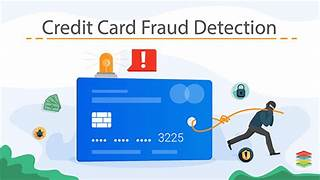

**CREDIT CARD FRAUD DETECTION**

**Introduction**

This project aims to build a machine learning model for detecting fraudulent credit card transactions. Credit card fraud is a significant problem for financial institutions and consumers, leading to substantial financial losses and security breaches. By developing an effective fraud detection system, we can help mitigate these risks and protect sensitive financial information.

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the datasets**

In [ ]:
import pandas as pd

# Load training and testing datasets
train_data = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Train shape: (1048575, 23)
Test shape: (555719, 23)


In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
new_var = train_data.columns
new_var

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
new_var = test_data.columns
new_var

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# Checking the shape of the data
num_rows, num_cols = train_data.shape

print("Shape of the Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}\n")

Shape of the Data:
Number of Rows: 1048575
Number of Columns: 23



In [ ]:
# Checking the shape of the data
num_rows, num_cols = test_data.shape

print("Shape of the Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}\n")

Shape of the Data:
Number of Rows: 555719
Number of Columns: 23



**Data preprocessing:**

* Data Cleaning

* Handle missing values

* Checking missing values

In [ ]:
# Check for missing values

print(train_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
# Check for missing values

print(test_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
# Checking duplicates if any

train_data.duplicated().any()

np.False_

In [ ]:
# Checking duplicates if any
test_data.duplicated().any()

np.False_

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Combine for unified preprocessing (optional)
df = pd.concat([train_data, test_data])

# Drop irrelevant columns (example: 'Unnamed: 0', 'trans_date_trans_time', etc.)
df.drop(['Unnamed: 0', 'trans_date_trans_time'], axis=1, inplace=True)

# Label encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split back to train and test
train_data = df.iloc[:len(train_data)]
test_data = df.iloc[len(train_data):]

# Scale numeric columns
scaler = StandardScaler()
num_cols = ['amt']
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])


In [ ]:
X_train = train_data.drop('is_fraud', axis=1)  # Features for training
y_train = train_data['is_fraud']  # Target variable for training
X_test = test_data.drop('is_fraud', axis=1)  # Features for testing
y_test = test_data['is_fraud']  # Target variable for testing

**Train and evaluate models**

1. Logistic Regression

Logistic Regression Results:
Accuracy: 0.9961401355721147
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    553574
       Fraud       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix:
 [[553574      0]
 [  2145      0]]


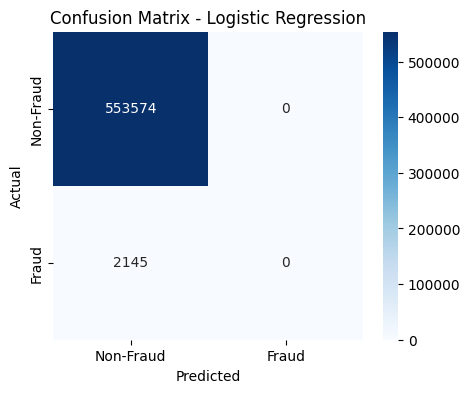

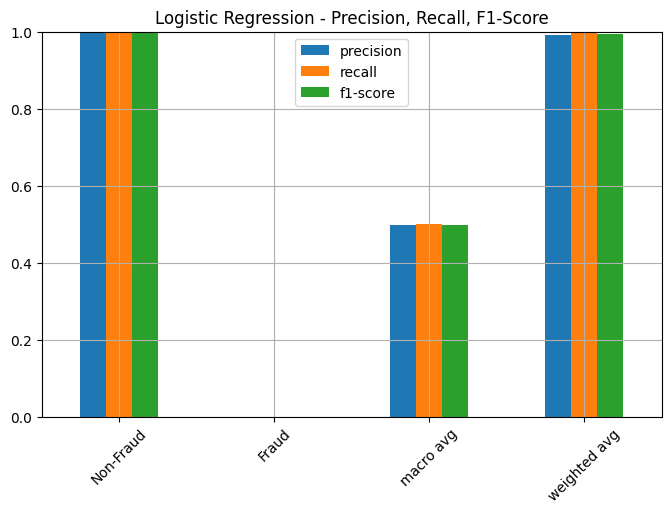

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Results
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=["Non-Fraud", "Fraud"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Classification report as DataFrame
report_log = classification_report(y_test, y_pred_log, target_names=["Non-Fraud", "Fraud"], output_dict=True)
report_df_log = pd.DataFrame(report_log).transpose()

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Precision, Recall, F1
report_df_log.drop(['accuracy'], inplace=True)
report_df_log[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5))
plt.title("Logistic Regression - Precision, Recall, F1-Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


2. XGBoost

XGBoost Results:
Accuracy: 0.9969426994578195
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    553574
       Fraud       0.83      0.26      0.40      2145

    accuracy                           1.00    555719
   macro avg       0.92      0.63      0.70    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix:
 [[553464    110]
 [  1589    556]]


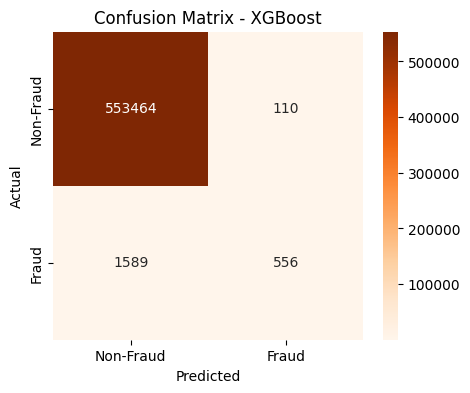

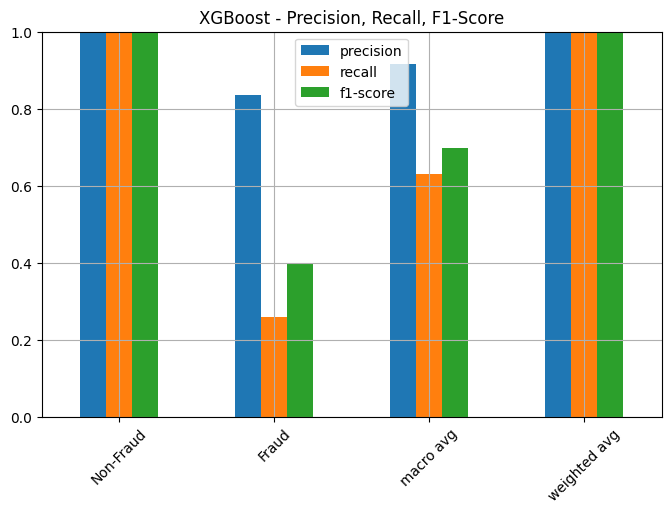

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=["Non-Fraud", "Fraud"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

report_xgb = classification_report(y_test, y_pred_xgb, target_names=["Non-Fraud", "Fraud"], output_dict=True)
report_df_xgb = pd.DataFrame(report_xgb).transpose()

plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

report_df_xgb.drop(['accuracy'], inplace=True)
report_df_xgb[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5))
plt.title("XGBoost - Precision, Recall, F1-Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


3. LightGBM

[LightGBM] [Info] Number of positive: 6006, number of negative: 1042569
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4347
[LightGBM] [Info] Number of data points in the train set: 1048575, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005728 -> initscore=-5.156684
[LightGBM] [Info] Start training from score -5.156684
LightGBM Results:
Accuracy: 0.9948553135667486
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    553574
       Fraud       0.38      0.55      0.45      2145

    accuracy                           0.99    555719
   macro avg       0.69      0.77      0.72    555719
weighted avg       1.00      0.99      1.00    555719

Confusion Matrix:
 [[551690   1884]
 [   975   1170]]


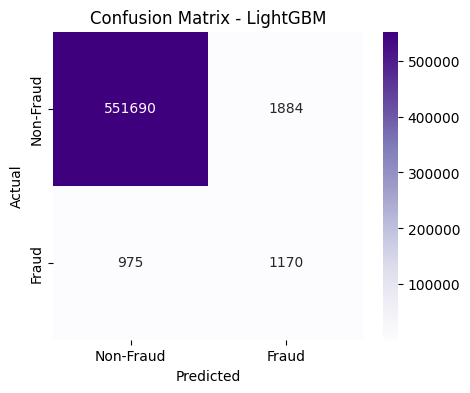

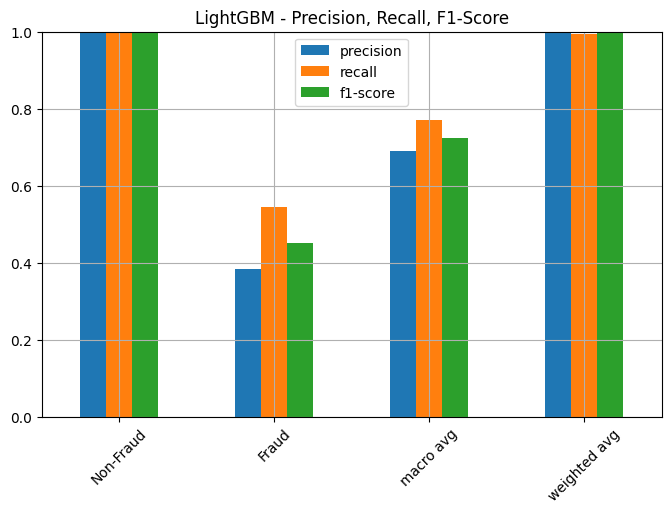

In [ ]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb, target_names=["Non-Fraud", "Fraud"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))

report_lgb = classification_report(y_test, y_pred_lgb, target_names=["Non-Fraud", "Fraud"], output_dict=True)
report_df_lgb = pd.DataFrame(report_lgb).transpose()

plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

report_df_lgb.drop(['accuracy'], inplace=True)
report_df_lgb[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5))
plt.title("LightGBM - Precision, Recall, F1-Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

log_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_log,
    'Model': 'Logistic Regression'
})

xgb_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_xgb,
    'Model': 'XGBoost'
})

lgb_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lgb,
    'Model': 'LightGBM'
})

# Combine selected models only
results_df = pd.concat([log_df, xgb_df, lgb_df])

# Save to CSV
results_df.to_csv('fraud_predictions_log_xgb_lgb.csv', index=False)

print("✅ Exported: fraud_predictions_log_xgb_lgb.csv")


✅ Exported: fraud_predictions_log_xgb_lgb.csv


In [ ]:
from sklearn.metrics import confusion_matrix
import pickle
models = {
    "XGBoost": y_pred_xgb,
    "Logistic Regression": y_pred_log,
    "LightGBM": y_pred_lgb
}

matrix_data = []

for model_name, y_pred in models.items():
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    matrix_data.append({
        "Model Name": model_name,
        "TP": tp,
        "FP": fp,
        "TN": tn,
        "FN": fn
    })

import pandas as pd
conf_matrix_df = pd.DataFrame(matrix_data)
conf_matrix_df.to_csv("confusion_matrix_summary.csv", index=False)